# __Plot marginal CO2 emissions over price__

In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import datetime as dt
import seaborn as sns
import os

In [10]:
file_path1 = '../../data/train.pkl'

In [11]:
df = pd.read_pickle(file_path1)
df.head()

,Price,CO2E_EMISSIONS_FACTOR
2009-07-01 04:00:00,1.35918,0.991217
2009-07-01 04:05:00,-0.00006,0.000000
2009-07-01 04:10:00,-0.00006,0.000000
2009-07-01 04:15:00,1.44014,0.991217
2009-07-01 04:20:00,1.75480,1.025701


In [16]:
df.CO2E_EMISSIONS_FACTOR.isna().any()

False

### __Mean of CO2 emsissions per time point__

In [36]:
bins_mean = list(np.linspace(df.CO2E_EMISSIONS_FACTOR.min()-0.000001,
                      df.CO2E_EMISSIONS_FACTOR.max()+0.000001, 
                      10))
group_names_mean = bins_mean[:-1]

In [37]:
bins_mean

[-1e-06,
 0.16575477777777775,
 0.33151055555555553,
 0.4972663333333333,
 0.663022111111111,
 0.8287778888888887,
 0.9945336666666665,
 1.1602894444444443,
 1.326045222222222,
 1.491801]

In [38]:
df["CO2_group"] = pd.cut(df.CO2E_EMISSIONS_FACTOR, bins_mean, labels=group_names_mean)

In [40]:
df.head()

,Price,CO2E_EMISSIONS_FACTOR,CO2_group
2009-07-01 04:00:00,1.35918,0.991217,0.828778
2009-07-01 04:05:00,-0.00006,0.000000,-0.000001
2009-07-01 04:10:00,-0.00006,0.000000,-0.000001
2009-07-01 04:15:00,1.44014,0.991217,0.828778
2009-07-01 04:20:00,1.75480,1.025701,0.994534


In [42]:
df_mean.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 937919 entries, 2009-07-01 04:00:00 to 2018-05-31 23:55:00
Data columns (total 3 columns):
Price                    937919 non-null float64
CO2E_EMISSIONS_FACTOR    902502 non-null float64
CO2_group                902502 non-null category
dtypes: category(1), float64(2)
memory usage: 62.4 MB


In [43]:
mean = df_mean.groupby("CO2_group").mean()
mean.CO2E_EMISSIONS_FACTOR.unique()

array([0.00208785, 0.26256109, 0.45580566, 0.57945478, 0.70509872,
       0.91960932, 1.09251284, 1.27711077, 1.3907395 ])

In [44]:
#fig = sns.barplot(mean.index, mean.Price)
#for i in fig.get_xticklabels():
#    i.set_rotation(90)
#plt.figure();

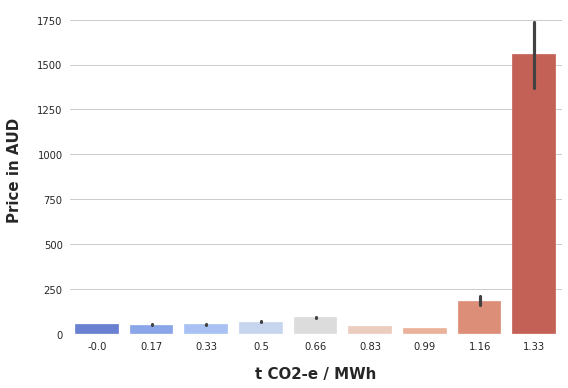

In [46]:
fig = sns.barplot(round(df_mean.CO2_group, 2), df_mean.Price, palette='coolwarm')

#for i in fig.get_xticklabels():
#    i.set_rotation(90)
fig.set_xlabel("t CO2-e / MWh", labelpad=15, fontsize=15, fontweight='bold')
fig.set_ylabel("Price in AUD", labelpad=15, fontsize=15, fontweight='bold')

plt.style.use('seaborn')
sns.set_style('whitegrid')

plt.tight_layout()
# file_path = '{}/Desktop/Portfolio_project/presentation/price_vs_CO2.png'.format(os.environ['HOME'])
# plt.savefig(file_path)

/home/user/venvs/dsr_teaching/lib/python3.6/site-packages/ipykernel_launcher.py:3: UserWarning: Attempted to set non-positive left xlim on a log-scaled axis.
Invalid limit will be ignored.
  This is separate from the ipykernel package so we can avoid doing imports until


<Figure size 864x360 with 0 Axes>

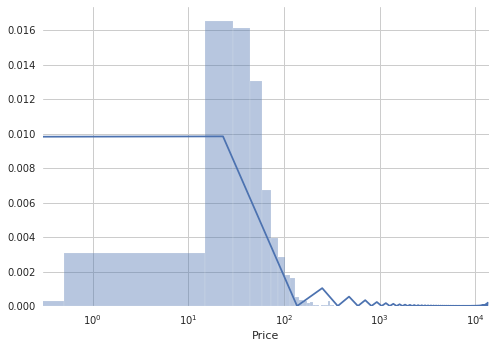

<Figure size 864x360 with 0 Axes>

In [47]:
fig = sns.distplot(df_mean.loc[:,["Price"]].fillna(value=-2000).Price, bins=1000)
fig.set_xscale('log')
fig.set_xlim(-1001, 14000)
plt.figure(figsize=(12, 5))